#Cargar bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Itsmynool/datasets/main/frijol.csv', sep=",")
#data.head()
data

,Tipo_Planta,Temperatura(H),Humedad(%),Luz(Lux),pH_Suelo,Contenido_Nutrientes(ppm),Porcentaje_Supervivencia
0,Frijol,28.00,50.00,6700.00,6.20,190.00,0.90000
1,Frijol,22.00,68.00,3700.00,7.20,120.00,0.74000
2,Frijol,27.00,60.00,4900.00,6.50,170.00,0.85000
3,Frijol,24.00,62.00,4500.00,6.80,140.00,0.78000
4,Frijol,29.00,55.00,6800.00,6.00,200.00,0.93000
...,...,...,...,...,...,...,...
1062,Frijol,27.71,56.63,4960.48,6.85,147.98,0.88823
1063,Frijol,29.38,50.32,5270.19,6.63,155.46,0.88934
1064,Frijol,27.53,57.82,4940.72,6.89,141.98,0.88865
1065,Frijol,28.80,52.11,5190.63,6.69,151.88,0.88998


In [4]:
# Calcula el rango de Porcentaje_Supervivencia
rango_min = data["Porcentaje_Supervivencia"].min()
rango_max = data["Porcentaje_Supervivencia"].max()

print("Rango de Porcentaje_Supervivencia:")
print("Mínimo:", rango_min)
print("Máximo:", rango_max)

Rango de Porcentaje_Supervivencia:
Mínimo: 0.42
Máximo: 0.93


In [10]:
'''
def clasificar_supervivencia(porcentaje):
    if porcentaje >= 0.5:
        return "Sobrevive"
    else:
        return "Muere"

data["Estado"] = data["Porcentaje_Supervivencia"].apply(clasificar_supervivencia)

conteo_sobrevive = data[data["Estado"] == "Sobrevive"].shape[0]
conteo_muere = data[data["Estado"] == "Muere"].shape[0]

print("Número de frijoles que sobreviven:", conteo_sobrevive)
print("Número de frijoles que mueren:", conteo_muere)
'''

Número de frijoles que sobreviven: 892
Número de frijoles que mueren: 175


In [6]:
data['co2'] = np.random.rand(len(data))

In [7]:

data = data.sample(frac=1).reset_index(drop=True)
data


,Tipo_Planta,Temperatura(H),Humedad(%),Luz(Lux),pH_Suelo,Contenido_Nutrientes(ppm),Porcentaje_Supervivencia,co2
0,Frijol,25.000,65.000,4200.000,7.000,130.000,0.45000,0.415650
1,Frijol,29.580,50.020,5290.270,6.610,156.380,0.80123,0.018707
2,Frijol,29.000,55.000,6800.000,6.000,200.000,0.93000,0.367419
3,Frijol,28.710,52.420,5180.760,6.690,151.720,0.72219,0.493251
4,Frijol,30.607,47.991,5380.118,6.656,158.584,0.83210,0.550808
...,...,...,...,...,...,...,...,...
1062,Frijol,27.740,56.390,4960.140,6.850,147.640,0.88890,0.277894
1063,Frijol,25.820,63.080,4670.690,7.000,135.040,0.61032,0.488839
1064,Frijol,30.740,47.458,5389.957,6.637,160.012,0.84043,0.494018
1065,Frijol,27.000,64.000,4800.000,6.800,140.000,0.43000,0.800007


In [11]:
# Agrupa los datos por rangos de valores de CO2 y calcula la tasa de mortalidad
co2_ranges = pd.cut(data['co2'], bins=3)
mortality_rate_by_co2 = data.groupby(co2_ranges)['Estado'].apply(lambda x: (x == 'Muere').mean())

# Muestra los resultados
print("Tasa de mortalidad por rango de CO2:")
print(mortality_rate_by_co2)

Tasa de mortalidad por rango de CO2:
co2
(-0.000409, 0.333]    0.156069
(0.333, 0.666]        0.170029
(0.666, 0.999]        0.165775
Name: Estado, dtype: float64


/var/folders/vx/qh5349cn0tq9qhrfylzzn2z40000gn/T/ipykernel_7524/1926668002.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_rate_by_co2 = data.groupby(co2_ranges)['Estado'].apply(lambda x: (x == 'Muere').mean())


In [ ]:
#df_no_sobrevive = data[data["Estado"] == "Muere"]

#print(df_no_sobrevive)

     Tipo_Planta  Temperatura(H)  Humedad(%)  Luz(Lux)  pH_Suelo  \
19        Frijol            28.0        63.0    5000.0       6.7   
21        Frijol            24.0        67.0    4000.0       7.0   
24        Frijol            26.0        66.0    4500.0       6.9   
27        Frijol            22.0        70.0    3800.0       7.3   
29        Frijol            26.0        66.0    4500.0       6.9   
...          ...             ...         ...       ...       ...   
1035      Frijol            26.0        66.0    4500.0       6.9   
1048      Frijol            24.0        67.0    4000.0       7.0   
1049      Frijol            28.0        63.0    5000.0       6.7   
1052      Frijol            28.0        63.0    5000.0       6.7   
1061      Frijol            24.0        67.0    4000.0       7.0   

      Contenido_Nutrientes(ppm)  Porcentaje_Supervivencia Estado  
19                        145.0                      0.42  Muere  
21                        125.0                  

array([[<Axes: title={'center': 'Temperatura(H)'}>,
        <Axes: title={'center': 'Humedad(%)'}>],
       [<Axes: title={'center': 'Luz(Lux)'}>,
        <Axes: title={'center': 'pH_Suelo'}>],
       [<Axes: title={'center': 'Contenido_Nutrientes(ppm)'}>,
        <Axes: title={'center': 'Porcentaje_Supervivencia'}>]],
      dtype=object)

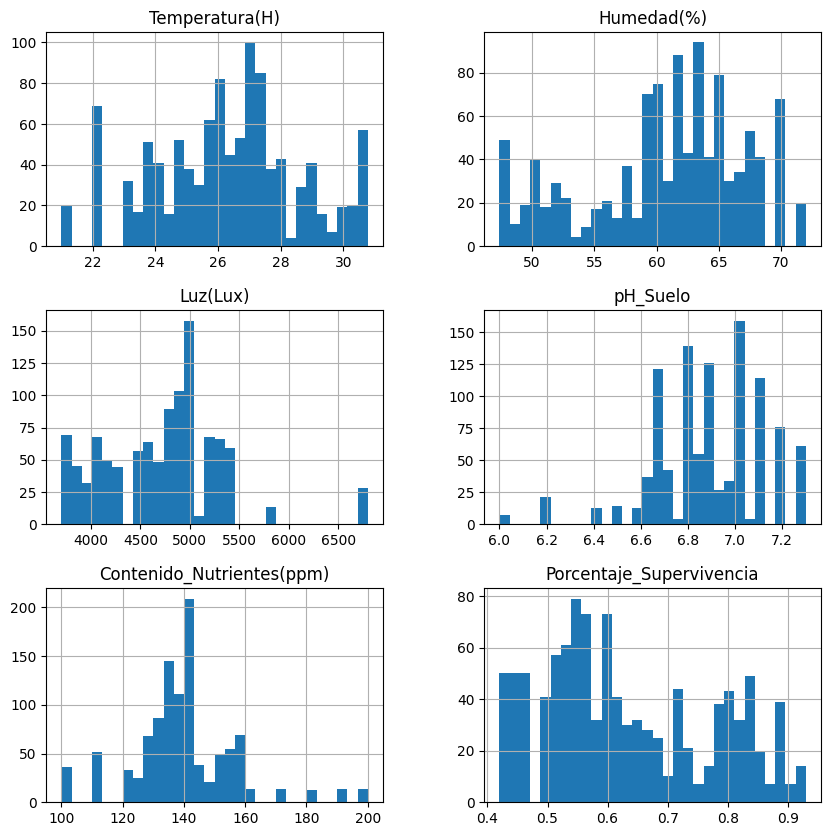

In [ ]:
data.hist(figsize=(10,10), bins=30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo_Planta                1067 non-null   object 
 1   Temperatura(H)             1067 non-null   float64
 2   Humedad(%)                 1067 non-null   float64
 3   Luz(Lux)                   1067 non-null   float64
 4   pH_Suelo                   1067 non-null   float64
 5   Contenido_Nutrientes(ppm)  1067 non-null   float64
 6   Porcentaje_Supervivencia   1067 non-null   float64
dtypes: float64(6), object(1)
memory usage: 58.5+ KB


#Modelo RandomForestRegressor

Separar Caracteristicas (X) y variable objetivo (y)

In [24]:
X = data[['Temperatura(H)', 'Humedad(%)', 'Luz(Lux)', 'pH_Suelo', 'Contenido_Nutrientes(ppm)']]
y = data['Porcentaje_Supervivencia']

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inicializar y entrenar el modelo de RandomForestRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [26]:
import joblib

# Guarda el modelo en un archivo
joblib.dump(model, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [17]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rse = rmse / np.mean(y_test)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"Error estandar residual (RSE): {rse}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raiz del error cuadrático medio (RMSE): {rmse}")
print(f"Error absoluto medio(MAE): {mae}")
print(f'Coeficiente de determinación (R^2): {r2}')
print(f"Error porcentual cuadrático medio (MAPE): {mape:.2f}%")

Error estandar residual (RSE): 0.06396546477849603
Error cuadrático medio (MSE): 0.0016283105509464165
Raiz del error cuadrático medio (RMSE): 0.04035233017988449
Error absoluto medio(MAE): 0.018542613114754105
Coeficiente de determinación (R^2): 0.9177454458855723
Error porcentual cuadrático medio (MAPE): 2.61%


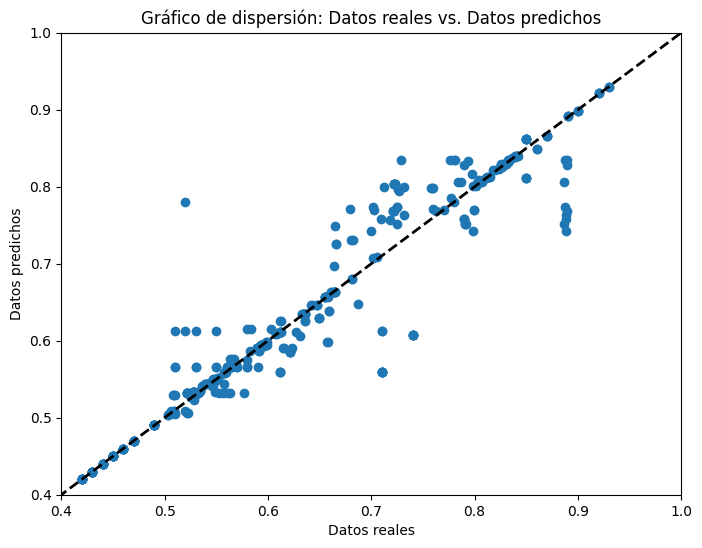

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim(0.4, 1.0)  # Limita el eje x entre 0.4 y 1.0
plt.ylim(0.4, 1.0)  # Limita el eje y entre 0.4 y 1.0
plt.xlabel('Datos reales')
plt.ylabel('Datos predichos')
plt.title('Gráfico de dispersión: Datos reales vs. Datos predichos')
plt.show()


In [ ]:
datos = pd.DataFrame({
    'Datos entrenamiento': y_test,
    'Datos predichos': y_pred
})

print(datos.head(20).to_string(index=False))

 Datos entrenamiento  Datos predichos
            0.920000         0.922000
            0.567430         0.567696
            0.490000         0.490000
            0.583924         0.615024
            0.649870         0.629940
            0.803210         0.805226
            0.420000         0.420000
            0.420000         0.420000
            0.830120         0.830104
            0.430000         0.430000
            0.503210         0.503210
            0.633670         0.634550
            0.556729         0.532513
            0.621340         0.585278
            0.558760         0.558832
            0.533210         0.533764
            0.579325         0.575066
            0.590120         0.590714
            0.621000         0.585278
            0.570000         0.566000


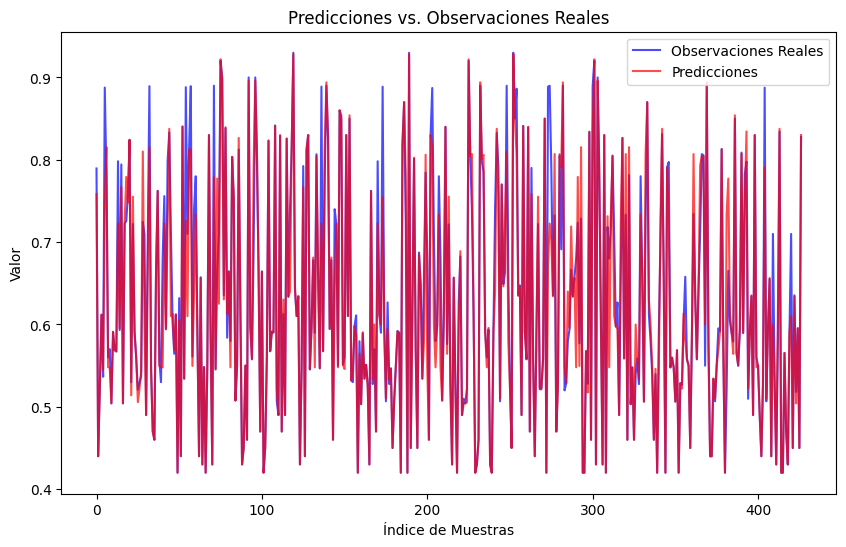

In [19]:
# Gráfico de Líneas de Predicción vs. Observaciones Reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Observaciones Reales', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicciones', color='red', alpha=0.7)
plt.title('Predicciones vs. Observaciones Reales')
plt.xlabel('Índice de Muestras')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [22]:
import time

In [29]:
# Función para simular la entrada de nuevos datos
def simulate_new_data():
    # Genera valores aleatorios para las características (features)
    new_data = {
        'Temperatura(H)': np.random.uniform(20, 30),  # Valores entre 20 y 30
        'Humedad(%)': np.random.uniform(40, 70),      # Valores entre 40 y 70
        'Luz(Lux)': np.random.uniform(3000, 7000),     # Valores entre 3000 y 7000
        'pH_Suelo': np.random.uniform(6.0, 7.5),       # Valores entre 6.0 y 7.5
        'Contenido_Nutrientes(ppm)': np.random.uniform(100, 250)  # Valores entre 100 y 250
      
    }
    return new_data

In [ ]:
data.score().save.local;

In [37]:
# Función para clasificar el estado de supervivencia
def classify_survival(prediction):
    if prediction >= 0.65:
        return "Sobrevive"
    else:
        return "Muere"

# Modificar la función para hacer predicciones basadas en los nuevos datos simulados
def predict_new_data(model, new_data):
    # Convierte los datos en un DataFrame
    df_new_data = pd.DataFrame([new_data])
    # Realiza la predicción
    prediction = model.predict(df_new_data)[0]  # Selecciona el primer elemento del array de predicciones
    # Clasifica el estado de supervivencia
    survival_status = classify_survival(prediction)
    return prediction, survival_status

# Bucle infinito para simular y predecir continuamente
while True:
    # Simula nuevos datos
    new_data = simulate_new_data()
    print("Nuevos datos generados:", new_data)

    # Realiza predicciones basadas en los nuevos datos
    prediction, survival_status = predict_new_data(model, new_data)
    print("Predicción basada en los nuevos datos:", prediction)
    print("Estado de supervivencia:", survival_status)

    # Pausa de 1 segundo entre iteraciones
    time.sleep(6)  # Asegúrate de importar time si aún no lo has hecho


Nuevos datos generados: {'Temperatura(H)': 25.293197718426068, 'Humedad(%)': 64.94835195964352, 'Luz(Lux)': 5408.135226288967, 'pH_Suelo': 6.1398078385799275, 'Contenido_Nutrientes(ppm)': 245.3391841653763, 'co2': 0.36272997650114513}
Predicción basada en los nuevos datos: 0.8409659999999999
Estado de supervivencia: Sobrevive
Nuevos datos generados: {'Temperatura(H)': 21.15946039720941, 'Humedad(%)': 49.978398617564245, 'Luz(Lux)': 4966.519566597143, 'pH_Suelo': 6.662087571280935, 'Contenido_Nutrientes(ppm)': 114.53170931176791, 'co2': 0.8648464738387001}
Predicción basada en los nuevos datos: 0.703082
Estado de supervivencia: Sobrevive
Nuevos datos generados: {'Temperatura(H)': 29.27839356350855, 'Humedad(%)': 69.55015058515156, 'Luz(Lux)': 4413.190436149166, 'pH_Suelo': 6.017867000998836, 'Contenido_Nutrientes(ppm)': 147.12799234424796, 'co2': 0.8087357116693934}
Predicción basada en los nuevos datos: 0.712
Estado de supervivencia: Sobrevive
Nuevos datos generados: {'Temperatura(H)':

KeyboardInterrupt: 